<a href="https://colab.research.google.com/github/asetya/BigData/blob/master/FiturSelction_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FEATURE SELECTION**

Contoh Program sumnber : https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
#Loading the dataset
x = load_boston()
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# FILTER METHOD

**1. FILTER MENGGUNAKAN PEARSON'S CORRELATION**


The correlation coefficient has values between -1 to 1

— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

— A value closer to 1 implies stronger positive correlation

— A value closer to -1 implies stronger negative correlation

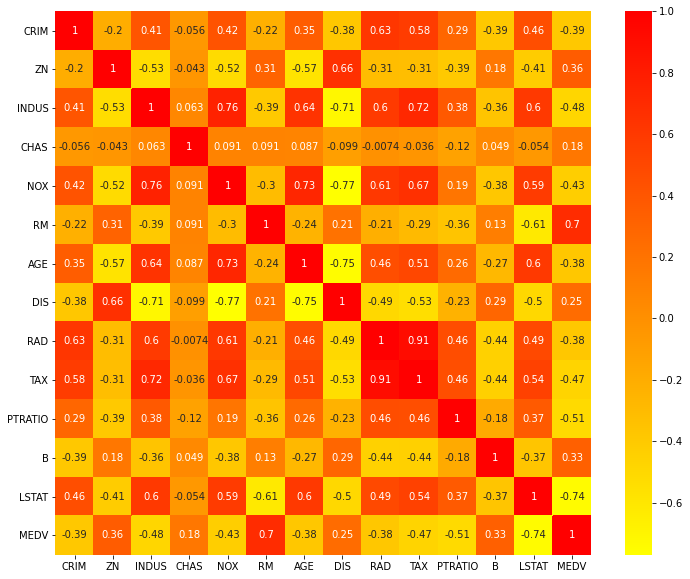

In [6]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.autumn_r)
plt.show()

KITA AKAN PILIH hanya yang memiliki korelasi diatas 0.5 saja yang dipilih menjadi fitur 


In [7]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

kita hanya akan mendapat fitur tersebut diatas 
Variabel RM, PTRATIO and LSTAT areberkorelasi tinggi dengan variabel tyarget (label)  MEDV

Selanjutnya akan kita lihat apakah variabel  RM, PTRATIO and LSTAT saling tergantung atau saling bebas 




In [8]:
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


dari hasil diatas RM dan  LSTAT berkorelasi tinggi  (-0.613808) oleh karena itu kita dapat memilih datu diantara keduanya, nah karena korelasi antara RM lebih dengan MEDV ( 0.695360) lebih rendah dari korelasi antara LSTAT dengan MEDV (0.737663) maka kita akan membuang RM dan mempertahankan LSTAT sehingga FITUR AKHIRNYA Menjadi : 

PTRATIO    

LSTAT 


****

# WRAPER METHODS

**BACKWARD ELIMINATION**

Performance metric YANG DIGUNAKAN UNTUK mengevaluasi fitur adalah  pvalue. Jika  pvalue > 0.05 fitur akan dibuang

OLS model ( “Ordinary Least Squares”) digunakan untuk mengeksekusi model regresi linear.


In [9]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

variable ‘AGE’ memiliki  pvalue terbesar : 0.9582293 diatas 0.05 sehingga kita akan membuang AGE lalu membuat model kembali tanpa AGE. Proses ini berulang. perulangan akan dilakukan dengan kode di bawah ini. VAriebel/fitur yang akan dipakai setelah perulangan adalah sebagai berikut : 

 ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [10]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


**Recursive Feature Elimination**



Misalkan kita menentukan jika kita ingin memilih 7 fitur dengan raknking teratas. 

model yang digunakan adalah model regresi linier 

untuk memiliih 7 teratas dapat digunakan : 

rfe = RFE(model, 7)

fitur terpilih adalah fitur fitur yang ditandai angka 1= paling penting

True = fitue relevant dan  False = fitur irrelevant.



In [11]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True  True False  True False
  True]
[2 4 3 1 1 1 7 1 1 5 1 6 1]


Angka 7 diatas ditentukan secara acak, jika ingin mencari tahu berapa sih jumlah fitur yang sebaiknya dipilih dapat digunakan kode program dibawah ini : 



In [12]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.663581


kita mendapati fitur yang terpilih untuk akurasi terbaik adalah 10, selanjutnya ke 10 fitur terpilih tersebut

In [13]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'LSTAT'],
      dtype='object')


# EMBEDDED METHODS

Embedded secara iterative dengan mengelola training proses secara iterative dan memilih fitur yang bverkontribusi paling besar pada proses training pada setiap iterasi. 

Metode regulaisasi (Regularization methods) palinmg banyak dipakai dalam metode embedded dengan mempinalti feature berpedomen pada nilai threshold yang ditentukan.

Dalam contoh ini kita akan memakai Lasso regularization.

Jika feature tidak relevant, lasso mempinalti koefisiennya dan meberi nilai  0 denghan kata lain fitur tersebut dibuang.  

In [14]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444


In [15]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

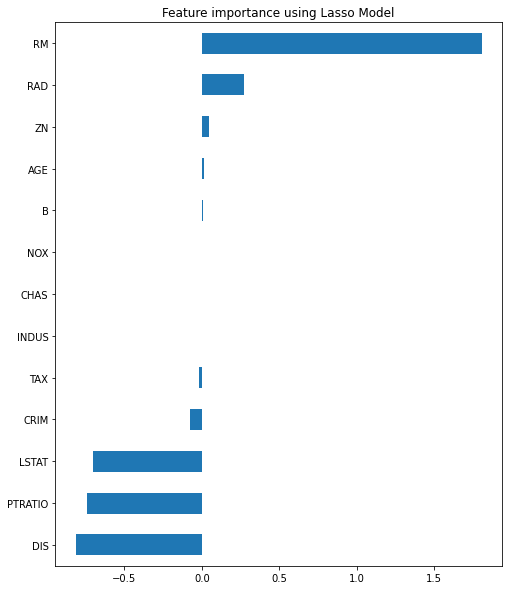

In [17]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Grafik diatas menggambarkan LASO memberikn pinalti kepda 3 varibel.fitur NOX, CHAS and INDUS dan menggunakan 10 lainnya (koefisiennya > 0)  

# Principal Component Analysis (PCA)

PCA adalah sebuah fungsi untuk mereduksi data 

mentransformasi dataset menjadi bentuk (form) terkompresi 

Misalkan kita akan mentrasnsformasi fitur dari dataset X yang sudah kita baca pada program ini sebelumnya, dan akan di transformasi menjadi 5 fitur saja - kita dapat menggunakan program dibawah ini 

In [25]:

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
fit = pca.fit(X)
print("Explained Variance: %s",fit.explained_variance_ratio_ )
print(fit.components_)

Explained Variance: %s [0.80582318 0.16305197 0.02134861 0.00695699 0.00129995]
[[ 2.92973218e-02 -4.35898000e-02  2.83309382e-02 -5.55846350e-05
   4.49721818e-04 -1.16815860e-03  8.36335746e-02 -6.56163360e-03
   4.50053753e-02  9.49741169e-01  5.60011721e-03 -2.91218514e-01
   2.29433756e-02]
 [ 6.66847277e-03  1.17564821e-03 -4.94975624e-03 -1.02678850e-04
   1.82069867e-06  3.65750108e-04 -5.72246652e-03  3.53685109e-04
  -8.61865948e-03 -2.92406308e-01 -2.52898538e-03 -9.56180551e-01
   5.76719865e-03]
 [-1.14793645e-02  6.32897481e-01 -8.83403603e-02 -9.75320360e-04
  -1.80720215e-03  4.73397110e-03 -7.55863075e-01  4.50884160e-02
   2.84787088e-03  9.38644477e-02 -1.11592649e-02 -2.35628231e-02
  -9.28333004e-02]
 [ 2.71309632e-02  7.68058991e-01 -1.28007210e-02  8.54389584e-04
   6.79655226e-04  5.70127889e-03  6.36608645e-01  2.57418757e-03
  -1.95602004e-02 -1.99794164e-02 -3.20107972e-02  4.03696433e-03
   4.52966144e-02]
 [ 9.52338065e-01 -5.67213995e-03 -5.71048624e-02 -2